In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, classification_report, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from operator import itemgetter
import math
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
from sklearn import metrics
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay
from imblearn.pipeline import make_pipeline

In [2]:
train_set = pd.read_csv("../data/aps_failure_training_set.csv", skiprows = 20)
train_set

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [3]:
test_set = pd.read_csv("../data/aps_failure_test_set.csv", skiprows = 20)
test_set

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,na,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,neg,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,neg,79636,na,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,neg,110,na,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


In [4]:
main_df = pd.DataFrame()
dfX = pd.DataFrame()
dfY = pd.DataFrame()
main_df = pd.concat([train_set, test_set])
dfX = main_df.iloc[:, 1:]
dfY = main_df.iloc[:, 0]

In [5]:
main_df.replace('na', np.nan, inplace = True)
dfX.replace('na', np.nan, inplace = True)
dfY.replace('na', np.nan, inplace = True)

In [6]:
print("NaN present in predictors:", dfX.isna().sum().sum())
print("NaN present in response:", dfY.isna().sum().sum())

NaN present in predictors: 1078695
NaN present in response: 0


In [7]:
predictors = dfX.columns
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
dfX = imputer.fit_transform(dfX)
dfX = pd.DataFrame(dfX, columns = predictors)
print("NaN present in predictors now:", dfX.isna().sum().sum())

NaN present in predictors now: 0


In [8]:
cv = {}
for i in range(dfX.shape[1]):
    cv[dfX.columns[i]] = dfX.iloc[:, i].std()/dfX.iloc[:, i].mean()
print("The Coefficient of Variation of the 170 columns are:")
cv

The Coefficient of Variation of the 170 columns are:


{'aa_000': 4.328607835435785,
 'ab_000': 2.178272593944041,
 'ac_000': 2.1676533085378886,
 'ad_000': 206.72149958176453,
 'ae_000': 22.293670429503308,
 'af_000': 18.209015502890768,
 'ag_000': 91.46065359583645,
 'ag_001': 42.08434252956986,
 'ag_002': 17.625908567425444,
 'ag_003': 8.753299520356666,
 'ag_004': 5.475116255434917,
 'ag_005': 2.9642299310403146,
 'ag_006': 2.3525878821684465,
 'ag_007': 2.8124979751566856,
 'ag_008': 6.274980079892739,
 'ag_009': 32.16705734053676,
 'ah_000': 2.3155400947419187,
 'ai_000': 18.506308128781928,
 'aj_000': 43.14447956358556,
 'ak_000': 78.62298773590766,
 'al_000': 9.11199122164582,
 'am_0': 9.067195453929418,
 'an_000': 2.2542266522583447,
 'ao_000': 2.2761144767667703,
 'ap_000': 3.0858848873966314,
 'aq_000': 2.853471317417596,
 'ar_000': 10.569202321811572,
 'as_000': 113.88275538316807,
 'at_000': 23.18705992823811,
 'au_000': 86.0856375114368,
 'av_000': 5.7304853575294405,
 'ax_000': 3.8590349934226182,
 'ay_000': 40.9025187557738

In [9]:
len(cv)

170

In [10]:
corr = dfX.corr()
corr

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.000000,0.019725,-0.011658,-0.000541,0.025795,0.035994,0.011682,0.076378,0.195161,0.307443,...,0.414125,0.419912,0.409659,0.419780,0.425679,0.356969,0.259668,0.133764,0.006688,0.010330
ab_000,0.019725,1.000000,-0.010898,0.000066,0.024869,0.043276,0.000590,0.006547,0.023484,0.035696,...,0.025161,0.037052,0.028766,0.034201,0.023921,0.013598,0.002371,0.000506,0.046897,0.075683
ac_000,-0.011658,-0.010898,1.000000,-0.002030,-0.004769,-0.010612,0.015534,-0.002333,-0.009439,-0.022889,...,-0.009808,-0.006437,-0.007962,-0.008115,-0.014680,-0.018631,0.010435,0.017293,-0.006191,0.015826
ad_000,-0.000541,0.000066,-0.002030,1.000000,-0.000195,-0.000236,-0.000038,-0.000034,-0.000093,-0.000223,...,-0.000883,-0.000921,-0.000908,-0.000730,-0.000745,-0.000462,-0.000794,-0.000500,-0.000082,-0.000091
ae_000,0.025795,0.024869,-0.004769,-0.000195,1.000000,0.829986,-0.000441,-0.000609,0.001948,0.020678,...,0.012751,0.019441,0.012847,0.026437,0.066533,0.036619,-0.008393,-0.006952,0.063587,0.030854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.356969,0.013598,-0.018631,-0.000462,0.036619,0.046482,0.007631,0.068003,0.181967,0.475570,...,0.442199,0.432911,0.419633,0.380132,0.543449,1.000000,0.227098,0.063065,-0.000309,0.000946
ee_008,0.259668,0.002371,0.010435,-0.000794,-0.008393,-0.010843,0.000067,0.005353,0.009109,0.020684,...,0.442532,0.470574,0.448390,0.394020,0.365686,0.227098,1.000000,0.690147,-0.005173,-0.001950
ee_009,0.133764,0.000506,0.017293,-0.000500,-0.006952,-0.008539,-0.001103,-0.003540,-0.009089,-0.018164,...,0.224587,0.235844,0.220785,0.183844,0.158590,0.063065,0.690147,1.000000,-0.003168,-0.001059
ef_000,0.006688,0.046897,-0.006191,-0.000082,0.063587,0.093474,-0.000076,0.001140,0.005625,0.011036,...,0.003718,0.010177,0.002989,0.026924,0.005298,-0.000309,-0.005173,-0.003168,1.000000,0.222579


<AxesSubplot:>

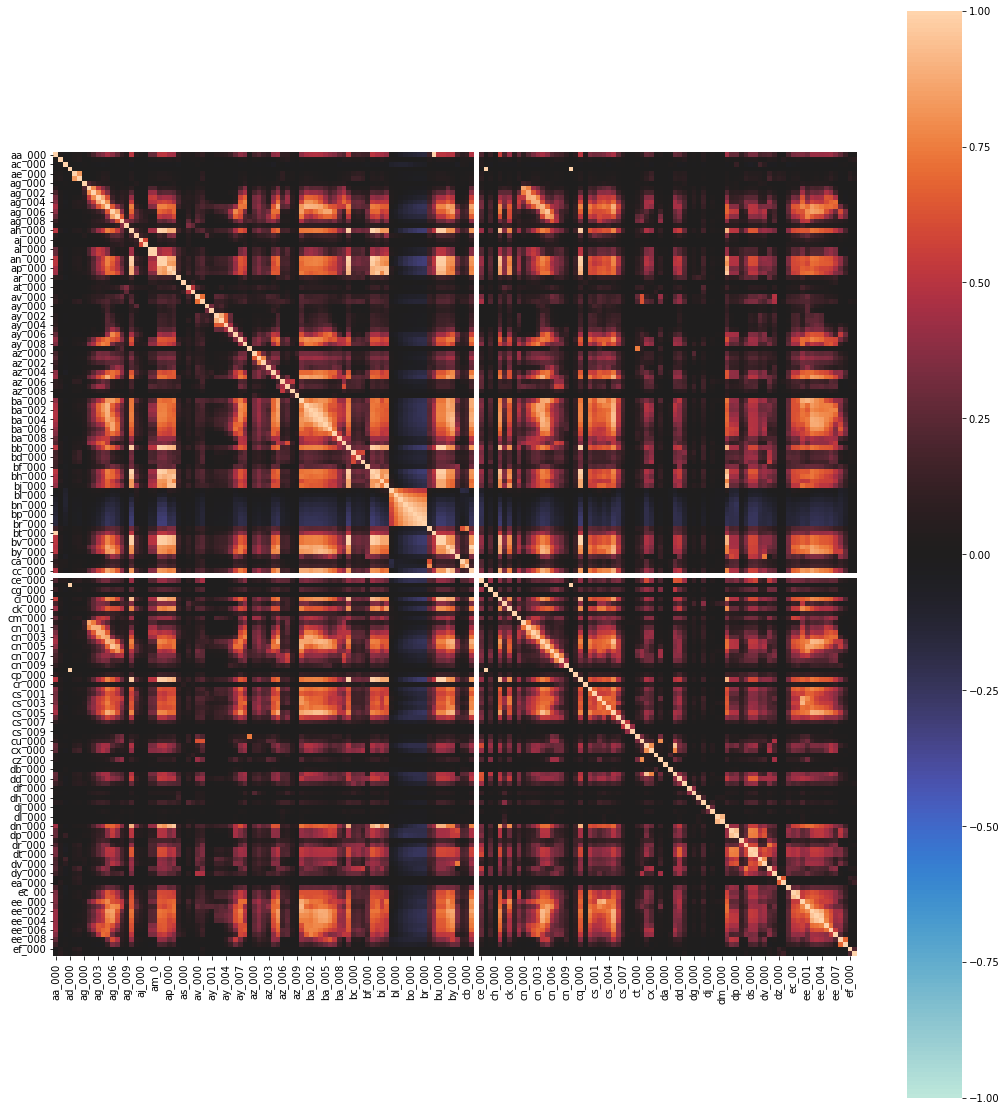

In [11]:
fig = plt.figure(figsize=(18,20))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True)

In [12]:
sqrt = int(np.floor(dfX.shape[1]**0.5))
top_cv = list(dict(sorted(cv.items(), key = itemgetter(1), reverse = True)[:sqrt]).keys())
print("The selected features are:\n", top_cv)

The selected features are:
 ['cf_000', 'co_000', 'ad_000', 'cs_009', 'dj_000', 'as_000', 'dh_000', 'df_000', 'ag_000', 'au_000', 'ak_000', 'az_009', 'ay_009']


In [13]:
new_main_df = pd.DataFrame()
new_main_df = dfX[top_cv]
new_main_df['class'] = dfY.values
new_main_df

,cf_000,co_000,ad_000,cs_009,dj_000,as_000,dh_000,df_000,ag_000,au_000,ak_000,az_009,ay_009,class
0,2.000000,220.000000,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
1,150231.156793,150517.375485,150629.962105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
2,0.000000,0.000000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
3,2.000000,2.000000,66.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
4,0.000000,202.000000,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,2.000000,42.000000,892.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
75996,2.000000,0.000000,46.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
75997,2.000000,378.000000,1518.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg
75998,0.000000,0.000000,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,neg


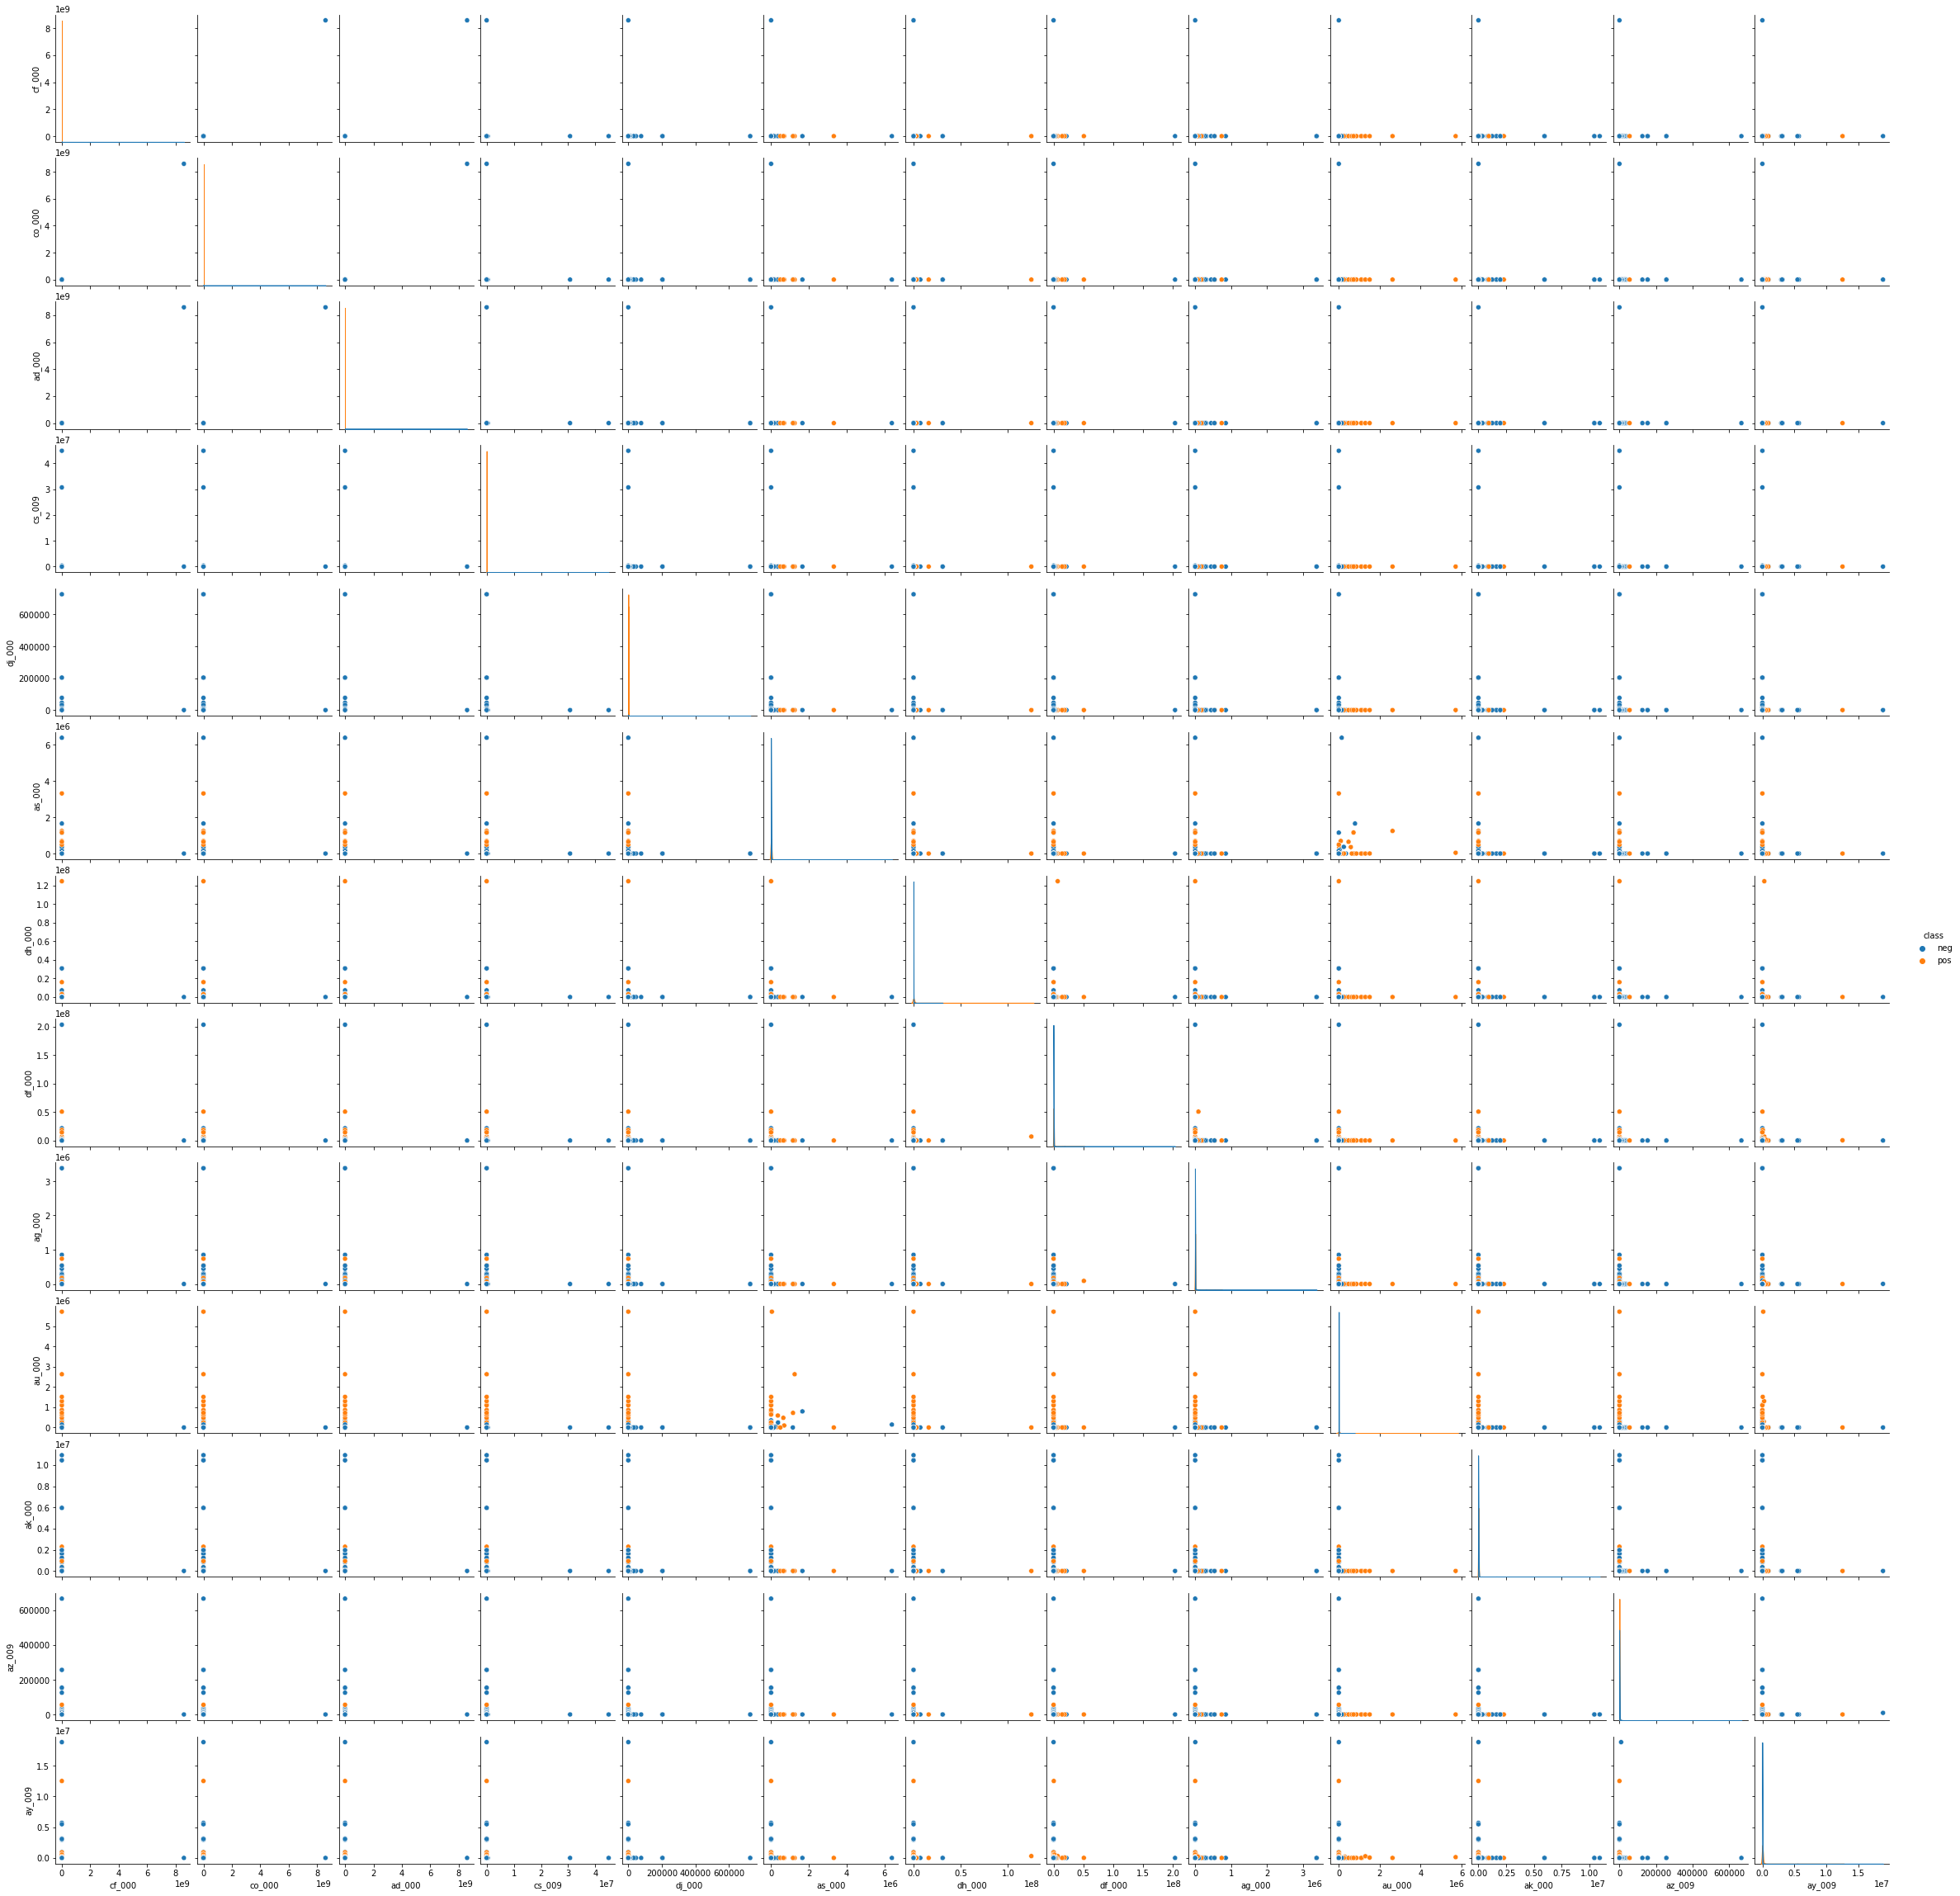

In [14]:
sns.pairplot(new_main_df, hue = 'class', kind = 'scatter')

<AxesSubplot:>

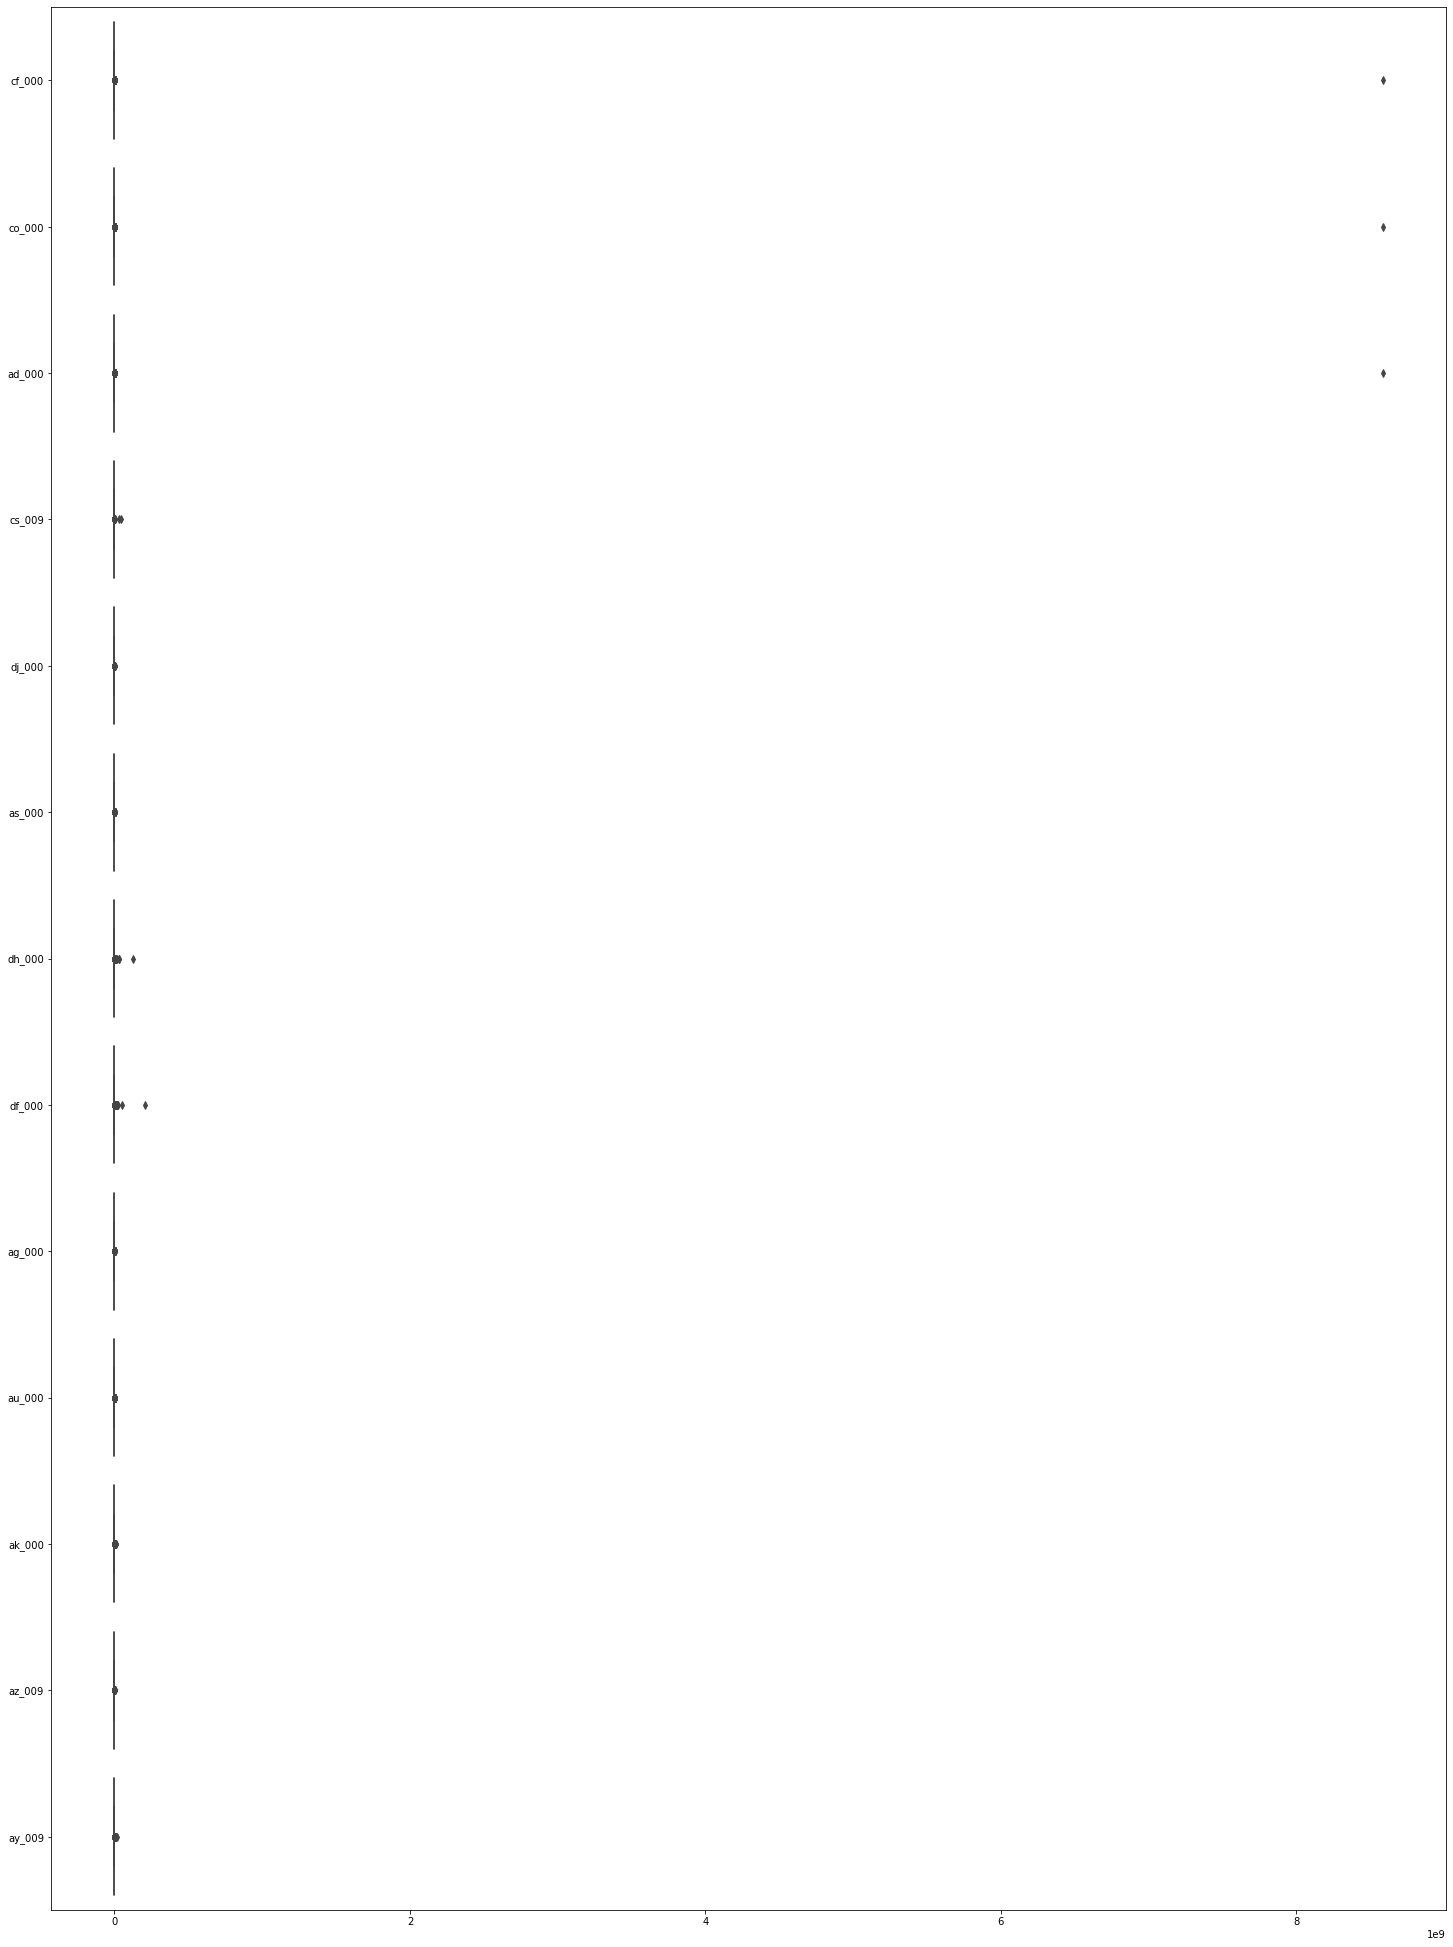

In [15]:
plt.figure(figsize=(25, 35))
sns.boxplot(data = new_main_df, orient='h')

##### We cannot draw any conclusions about significance of the features solely based on the scatter plots, because they tell us about the relationship between features. But we can say that some features are inter-correlated.

In [16]:
new_main_df['class'].value_counts()

neg    74625
pos     1375
Name: class, dtype: int64

##### The dataset is very imbalanced

In [17]:
train_X = dfX.iloc[:60000, :]
train_y = dfY.iloc[:60000]
test_X = dfX.iloc[60000:, :]
test_y = dfY.iloc[60000:]

In [18]:
print(np.shape(train_X))
print(np.shape(train_y))
print(np.shape(test_X))
print(np.shape(test_y))

(60000, 170)
(60000,)
(16000, 170)
(16000,)


In [19]:
train_y = train_y.replace({'pos': 1, 'neg': 0})
test_y = test_y.replace({'pos': 1, 'neg': 0})

In [20]:
model = RandomForestClassifier(oob_score=True)
model.fit(train_X, train_y)
predictions_train = model.predict(train_X)
predictions_test = model.predict(test_X)
pred_prob_train = model.predict_proba(train_X)
pred_prob_test = model.predict_proba(test_X)

RESULTS ON TRAIN DATASET


The confusion matrix:
 [[59000     0]
 [    1   999]]


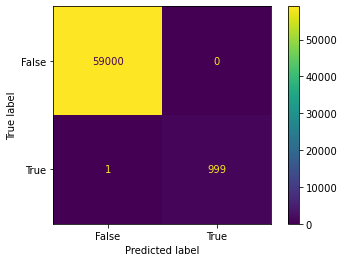


Misclassification rate: 1.694886527346994e-05
AUC score: 1.0


In [21]:
print("RESULTS ON TRAIN DATASET\n\n")
c_matrix = confusion_matrix(train_y, predictions_train)
print("The confusion matrix:\n", c_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

TN, FP, FN, TP = c_matrix.ravel()
miss_rate1 = ((FP + FN)/(TN + FP + FN + FP))
print("\nMisclassification rate:", miss_rate1)

auc1 = roc_auc_score(train_y, pred_prob_train[:, 1])
print("AUC score:" ,auc1)

oob_train_error1 = 1 - model.oob_score_

RESULTS ON TEST DATASET


The confusion matrix:
 [[15607    18]
 [  104   271]]


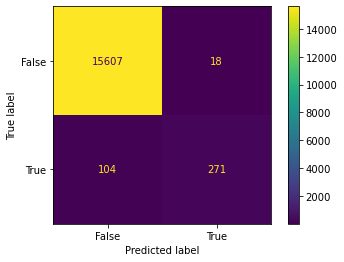


Misclassification rate: 0.007747507461738744
AUC score: 0.9929152853333334


In [22]:
print("RESULTS ON TEST DATASET\n\n")
c_matrix = confusion_matrix(test_y, predictions_test)
print("The confusion matrix:\n", c_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

TN, FP, FN, TP = c_matrix.ravel()
miss_rate2 = ((FP + FN)/(TN + FP + FN + FP))
print("\nMisclassification rate:", miss_rate2)

auc2 = roc_auc_score(test_y, pred_prob_test[:, 1])
print("AUC score:", auc2)

test_error1 = ((FP + FN)/(TN + FP + FN + FP))

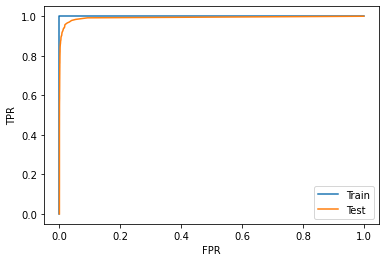

In [23]:
fpr1, tpr1, thresholds1 = metrics.roc_curve(train_y, pred_prob_train[:, 1])
fpr2, tpr2, thresholds2  = metrics.roc_curve(test_y, pred_prob_test[:, 1])

plt.plot(fpr1, tpr1, label='Train')
plt.plot(fpr2, tpr2, label='Test')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

In [24]:
print("Out of Bag error estimate: ", oob_train_error1)
print("Test error: ", test_error1)

Out of Bag error estimate:  0.0060833333333333295
Test error:  0.007747507461738744


##### The Out of Bag error estimate of the Random Forest is lower than the model's test error

In [25]:
smote = SMOTE()
new_trainX, new_trainY = smote.fit_resample(train_X, train_y)

In [26]:
model = RandomForestClassifier(oob_score=True)
model.fit(new_trainX, new_trainY)
predictions_train = model.predict(new_trainX)
predictions_test = model.predict(test_X)
pred_prob_train = model.predict_proba(new_trainX)
pred_prob_test = model.predict_proba(test_X)

RESULTS ON TRAIN DATASET


The confusion matrix:
 [[59000     0]
 [    0 59000]]


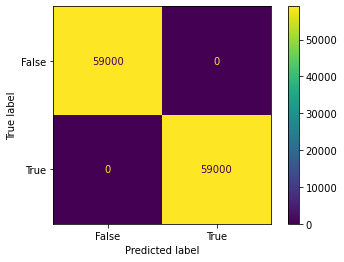


Misclassification rate: 0.0
AUC score: 1.0


In [27]:
print("RESULTS ON TRAIN DATASET\n\n")
c_matrix = confusion_matrix(new_trainY, predictions_train)
print("The confusion matrix:\n", c_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

TN, FP, FN, TP = c_matrix.ravel()
miss_rate3 = ((FP + FN)/(TN + FP + FN + FP))
print("\nMisclassification rate:", miss_rate3)

auc3 = roc_auc_score(new_trainY, pred_prob_train[:, 1])
print("AUC score:", auc3)

oob_train_error2 = 1 - model.oob_score_

RESULTS ON TEST DATASET


The confusion matrix:
 [[15545    80]
 [   63   312]]


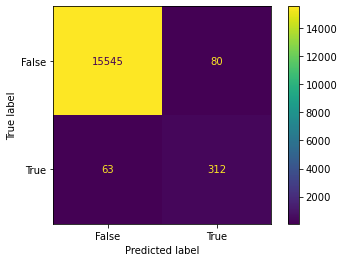


Misclassification rate: 0.009069000507356671
AUC score: 0.9942961493333333


In [28]:
print("RESULTS ON TEST DATASET\n\n")
c_matrix = confusion_matrix(test_y, predictions_test)
print("The confusion matrix:\n", c_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

TN, FP, FN, TP = c_matrix.ravel()
miss_rate4 = ((FP + FN)/(TN + FP + FN + FP))
print("\nMisclassification rate:", miss_rate4)

auc4 = roc_auc_score(test_y, pred_prob_test[:, 1])
print("AUC score:" ,auc4)

test_error2 = ((FP + FN)/(TN + FP + FN + FP))

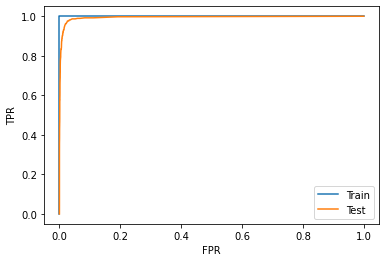

In [29]:
fpr1, tpr1, thresholds1 = metrics.roc_curve(new_trainY, pred_prob_train[:, 1])
fpr2, tpr2, thresholds2  = metrics.roc_curve(test_y, pred_prob_test[:, 1])

plt.plot(fpr1, tpr1, label='Train')
plt.plot(fpr2, tpr2, label='Test')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

In [30]:
print("Out of Bag error estimate: ", oob_train_error2)
print("Test error: ", test_error2)

Out of Bag error estimate:  0.0030254237288135366
Test error:  0.009069000507356671


##### The Out of Bag error estimate of the Random Forest is lower than the model's test error

##### RESULTS

In [31]:
res = {}
res['Misclassification rate (Train)'] = [miss_rate1, miss_rate3]
res['Misclassification rate (Test)'] = [miss_rate2, miss_rate4]
res['AUC score (Train)'] = [auc1, auc3]
res['AUC score (Test)'] = [auc2, auc4]
res['OOB error estimate'] = [oob_train_error1, oob_train_error2]
res['Test Error'] = [test_error1, test_error2]
results = pd.DataFrame(res, index = ['Imbalanced classes (Q1c)', 'Balanced classes (Q1d)'])
results

,Misclassification rate (Train),Misclassification rate (Test),AUC score (Train),AUC score (Test),OOB error estimate,Test Error
Imbalanced classes (Q1c),0.000017,0.007748,1.0,0.992915,0.006083,0.007748
Balanced classes (Q1d),0.000000,0.009069,1.0,0.994296,0.003025,0.009069


In [32]:
encode = LabelEncoder()
train_y = encode.fit_transform(train_y)
test_y = encode.fit_transform(test_y)

In [33]:
model = xgb.XGBClassifier(objective = "binary:logistic", eval_metric = 'logloss', reg_lambda = 0, n_jobs=-1) 
grid_param = {'reg_alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
gd_CV = GridSearchCV(model, grid_param, cv=5, scoring ='f1')
gd_CV.fit(train_X, train_y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=0, ...),
             param_grid={'reg_alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='f1')

In [34]:
pred1 = gd_CV.predict(train_X)
pred_prob_train = gd_CV.predict_proba(train_X)
pred_prob_test = gd_CV.predict_proba(test_X)
print("Best Alpha:", gd_CV.best_params_['reg_alpha'])
print("Best score value:", gd_CV.best_score_)
pred2 = gd_CV.predict(test_X)

Best Alpha: 0.1
Best score value: 0.8300482269929054


RESULTS ON TRAIN DATASET


The confusion matrix:
 [[59000     0]
 [    1   999]]


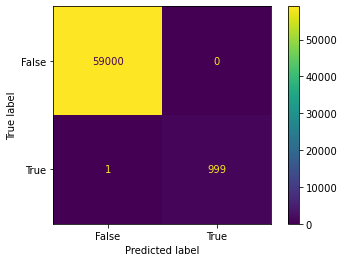

AUC score: 1.0

Train error at the best alpha: 0.008937500000000043


In [35]:
print("RESULTS ON TRAIN DATASET\n\n")
c_matrix = confusion_matrix(train_y, pred1)
print("The confusion matrix:\n", c_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

auc5 = roc_auc_score(train_y, pred_prob_train[:, 1])
print("AUC score:", auc5)

error1 = 1 - ((TN + TP)/(TN + FP + FN + TP))
print("\nTrain error at the best alpha:", error1)

RESULTS ON TEST DATASET


The confusion matrix:
 [[15610    15]
 [   82   293]]


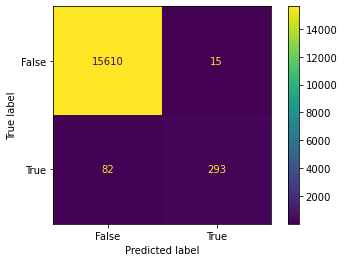

AUC score: 0.9951312213333333

Test Error at the best alpha:  0.006062499999999971


In [36]:
print("RESULTS ON TEST DATASET\n\n")
c_matrix = confusion_matrix(test_y, pred2)
print("The confusion matrix:\n", c_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

auc6 = roc_auc_score(test_y, pred_prob_test[:, 1])
print("AUC score:", auc6)

TN, FP, FN, TP = c_matrix.ravel()
error2 = 1 - ((TN + TP)/(TN + FP + FN + TP))
print("\nTest Error at the best alpha: ", error2)

##### The train error is lesser than the test error 

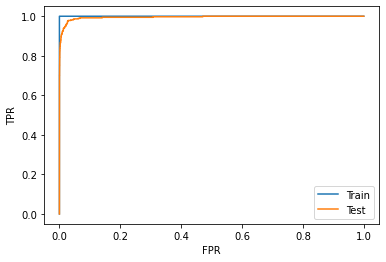

In [37]:
fpr1, tpr1, thresholds1 = metrics.roc_curve(train_y, pred_prob_train[:, 1])
fpr2, tpr2, thresholds2  = metrics.roc_curve(test_y, pred_prob_test[:, 1])

plt.plot(fpr1, tpr1, label='Train')
plt.plot(fpr2, tpr2, label='Test')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

In [38]:
model = xgb.XGBClassifier(objective = "binary:logistic", eval_metric = 'logloss', reg_lambda = 0, n_jobs=-1) 
pipe = make_pipeline(SMOTE(random_state=100), model)

param_grid = {
    "xgbclassifier__reg_alpha":[0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "xgbclassifier__objective": ["binary:logistic"],
    "xgbclassifier__eval_metric": ["logloss"],
    "xgbclassifier__reg_lambda":[0],
    "xgbclassifier__n_jobs":[-1]}
        
gd_CV = GridSearchCV(pipe, param_grid, cv=5, scoring ='f1')
gd_CV.fit(train_X, train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=100)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric='logloss',
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      importance_type=...
                                                      n_estimators=100,
                                                      n_jobs=-1,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None,
                                                      reg_alpha=None,
                                                      reg_lambda=0, ...))]),
             param_grid={'xgbclassifier__eval_metric': ['logloss'],
                         'xgbclassifier__n_jobs': [-1],
                         'xgbclassifier__objective': ['binary:logistic'],
                         'xgbclassifier__reg_alpha': [0.001, 0.01, 0.1, 1, 10,
                                                      100, 1000],
                         'xgbclassifier__reg_lambda': [0]},
             scoring='f1')

In [39]:
print("Best alpha:", gd_CV.best_params_['xgbclassifier__reg_alpha'])
print("Best score value:", gd_CV.best_score_)

Best alpha: 0.01
Best score value: 0.8108260487617878


In [40]:
model = xgb.XGBClassifier(objective = "binary:logistic", eval_metric = 'logloss',reg_alpha = gd_CV.best_params_['xgbclassifier__reg_alpha'] ,reg_lambda = 0,  n_jobs=-1) 
model.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.01, reg_lambda=0, ...)

In [41]:
pred1 = model.predict(new_trainX)
pred_prob_train = model.predict_proba(new_trainX)
pred_prob_test = model.predict_proba(test_X)
pred2 = model.predict(test_X)

RESULTS ON TRAIN DATASET


The confusion matrix:
 [[59000     0]
 [ 5921 53079]]


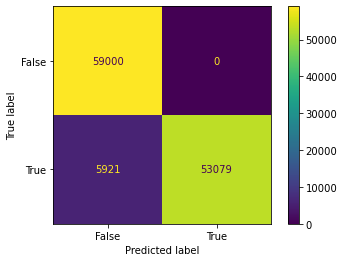

AUC score: 0.9991673814995692

Train error at the best alpha: 0.006062499999999971


In [42]:
print("RESULTS ON TRAIN DATASET\n\n")
c_matrix = confusion_matrix(new_trainY, pred1)
print("The confusion matrix:\n", c_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

auc7 = roc_auc_score(new_trainY, pred_prob_train[:, 1])
print("AUC score:", auc7)

error3 = 1 - ((TN + TP)/(TN + FP + FN + TP))
print("\nTrain error at the best alpha:", error3)

RESULTS ON TEST DATASET


The confusion matrix:
 [[15610    15]
 [   80   295]]


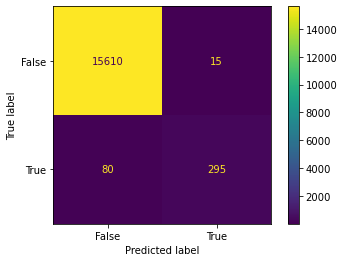

AUC score: 0.99583488

Test Error at the best alpha:  0.00593750000000004


In [43]:
print("RESULTS ON TEST DATASET\n\n")
c_matrix = confusion_matrix(test_y, pred2)
print("The confusion matrix:\n", c_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

auc8 = roc_auc_score(test_y, pred_prob_test[:, 1])
print("AUC score:", auc8)

TN, FP, FN, TP = c_matrix.ravel()
error4 = 1 - ((TN + TP)/(TN + FP + FN + TP))
print("\nTest Error at the best alpha: ", error4)

##### The test error is lesser than the train error 

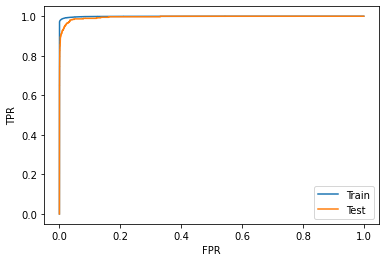

In [44]:
fpr1, tpr1, thresholds1 = metrics.roc_curve(new_trainY, pred_prob_train[:, 1])
fpr2, tpr2, thresholds2  = metrics.roc_curve(test_y, pred_prob_test[:, 1])

plt.plot(fpr1, tpr1, label='Train')
plt.plot(fpr2, tpr2, label='Test')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

In [45]:
res = {}
res['Train error'] = [error1, error3]
res['Test error'] = [error2, error4]
res['AUC score (Train)'] = [auc5, auc7]
res['AUC score (Test)'] = [auc6, auc8]
results1 = pd.DataFrame(res, index = ['Imbalanced classes (Q1e)', 'After applying SMOTE (Q1f)'])
results1

,Train error,Test error,AUC score (Train),AUC score (Test)
Imbalanced classes (Q1e),0.008938,0.006062,1.000000,0.995131
After applying SMOTE (Q1f),0.006062,0.005938,0.999167,0.995835


##### The train error and test error is seen to decrease after applying SMOTE.
##### The AUC score is seen to decrease on the train set after applying SMOTE. The AUC score is seen to increase on the test set after applying SMOTE.

##### We get better results on the test set, after applying SMOTE.